# Home Deco Business Analysis - Exploratory Data Analysis

This notebook contains the exploratory data analysis of the Home Deco business data, focusing on:
1. Sales trends and patterns
2. Customer behavior analysis
3. Marketing campaign performance
4. Web traffic analysis

In [9]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Check available styles
print("Available styles:", plt.style.available)

# Set simple style for all visualizations
plt.style.use('default')  # Using default style

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Available styles: ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


## Data Loading and Initial Exploration

In [5]:
# Load datasets
monthly_sales = pd.read_excel('../data/monthly_sales_ads_data.xlsx')
daily_clients = pd.read_excel('../data/daily_clients.xlsx')
daily_web = pd.read_excel('../data/daily_web_traffic.xlsx')
clients_sorted = pd.read_excel('../data/df_clients_daily_sorted.xlsx')

## 2. Sales Trends and Patterns

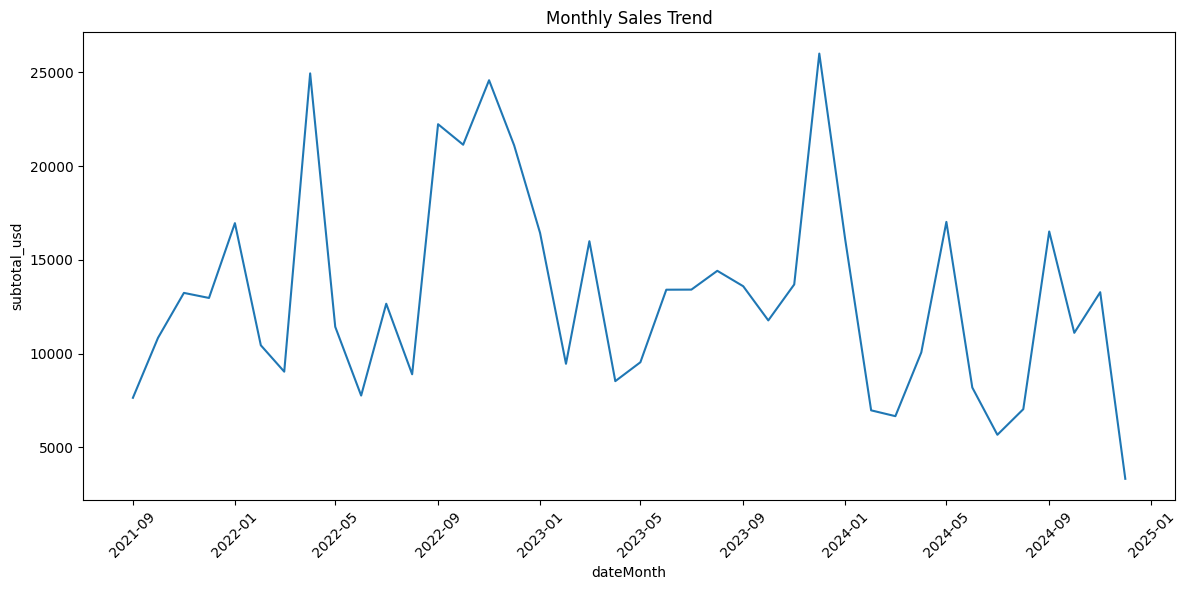

In [28]:
# 1. Monthly Sales Analysis
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='dateMonth', y='subtotal_usd')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

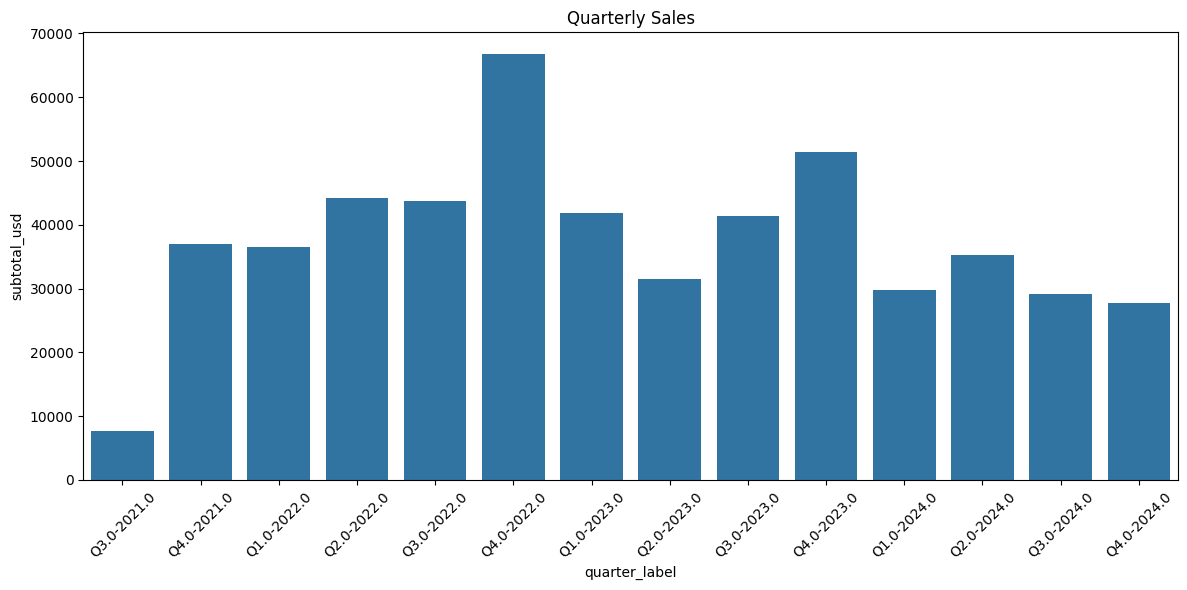

In [29]:
# Quarterly Sales Analysis
quarterly_sales = monthly_sales.groupby(['year', 'quarter']).agg({
    'subtotal_usd': 'sum',
    'n_items': 'sum',
    'unique_clients': 'mean',
    'costo_ads_usd': 'sum'
}).reset_index()

quarterly_sales['quarter_label'] = quarterly_sales.apply(
    lambda x: f"Q{x['quarter']}-{x['year']}", axis=1
)

plt.figure(figsize=(12, 6))
sns.barplot(data=quarterly_sales, x='quarter_label', y='subtotal_usd')
plt.title('Quarterly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2. Customer Behavior Analysis

In [30]:
# 2. Monthly Customer and Sales Metrics
monthly_metrics = monthly_sales.agg({
    'subtotal_usd': ['mean', 'std', 'min', 'max'],
    'n_items': ['mean', 'std', 'min', 'max'],
    'unique_clients': ['mean', 'std', 'min', 'max']
}).round(2)
print("\nMonthly Performance Metrics:")
print(monthly_metrics)


Monthly Performance Metrics:
      subtotal_usd  n_items  unique_clients
mean      13104.45    95.52           31.08
std        5509.26    36.37           10.54
min        3325.00    25.00            7.00
max       26004.00   206.00           53.00


## 3. Web Traffic Analysis

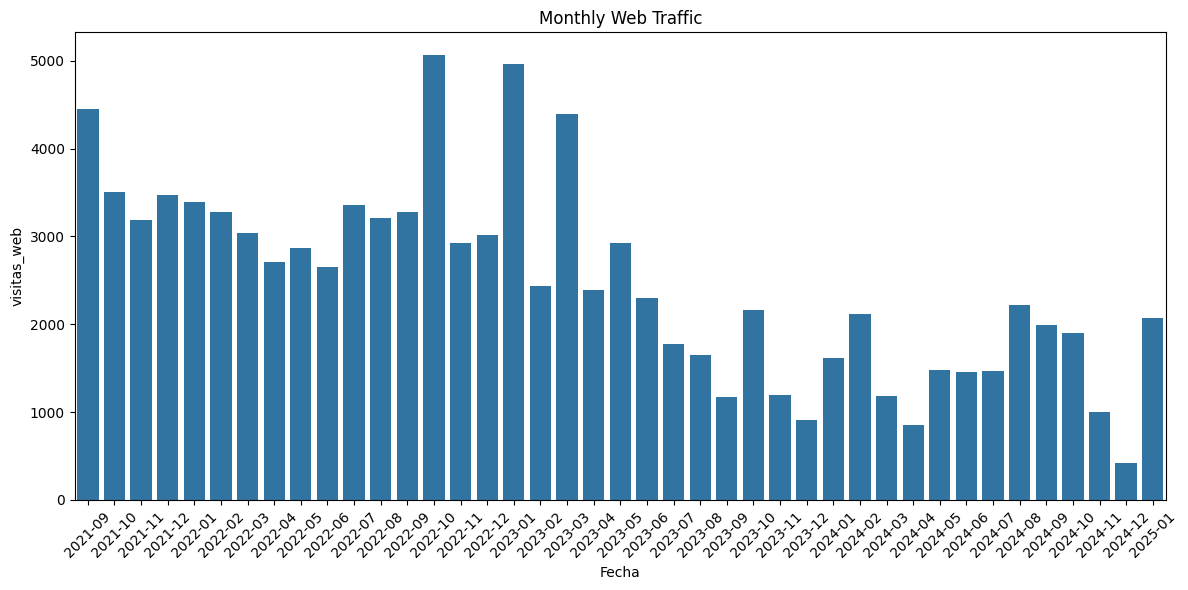

In [31]:
# 3. Web Traffic - Monthly View
monthly_web = daily_web.groupby(pd.to_datetime(daily_web['Fecha']).dt.to_period('M')).agg({
    'visitas_web': 'sum'
}).reset_index()
monthly_web['Fecha'] = monthly_web['Fecha'].astype(str)

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_web, x='Fecha', y='visitas_web')
plt.title('Monthly Web Traffic')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

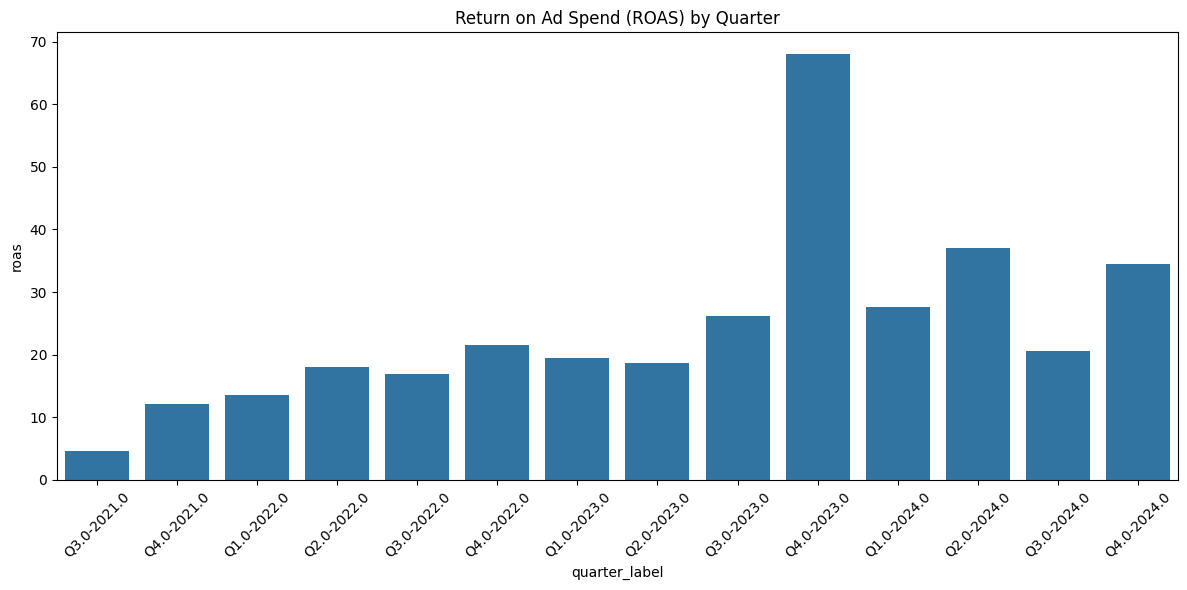

In [32]:
# 4. Marketing Performance by Quarter
quarterly_sales['roas'] = quarterly_sales['subtotal_usd'] / quarterly_sales['costo_ads_usd']
plt.figure(figsize=(12, 6))
sns.barplot(data=quarterly_sales, x='quarter_label', y='roas')
plt.title('Return on Ad Spend (ROAS) by Quarter')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
# 5. Monthly Marketing Metrics
monthly_sales['roas'] = monthly_sales['subtotal_usd'] / monthly_sales['costo_ads_usd']
monthly_sales['ctr'] = (monthly_sales['clics'] / monthly_sales['impresiones'] * 100).round(2)
monthly_sales['conversion_rate'] = (monthly_sales['unique_clients'] / monthly_sales['visitas_web'] * 100).round(2)

print("\nQuarterly Performance Summary:")
quarterly_summary = quarterly_sales.groupby('quarter').agg({
    'subtotal_usd': 'mean',
    'n_items': 'mean',
    'unique_clients': 'mean',
    'roas': 'mean'
}).round(2)
print(quarterly_summary)


Quarterly Performance Summary:
         subtotal_usd  n_items  unique_clients  roas
quarter                                             
1            36024.00   289.67           31.89 20.20
2            36975.00   290.67           27.89 24.62
3            30526.75   220.00           31.75 17.11
4            45768.50   300.00           33.17 34.07


In [34]:
# 6. Customer Segmentation by Quarter
customer_quarterly = daily_clients.groupby(['year', 'quarter']).agg({
    'cliente_id': 'nunique',
    'subtotal_usd': 'sum',
    'cantidad': 'sum'
}).reset_index()

customer_quarterly['avg_order_value'] = (
    customer_quarterly['subtotal_usd'] / customer_quarterly['cliente_id']
).round(2)

print("\nCustomer Metrics by Quarter:")
print(customer_quarterly)


Customer Metrics by Quarter:
    year  quarter  cliente_id  subtotal_usd  cantidad  avg_order_value
0   2021        3          37          7646        83           206.65
1   2021        4         138         37054       396           268.51
2   2022        1         117         36448       341           311.52
3   2022        2         104         44148       388           424.50
4   2022        3         115         43801       314           380.88
5   2022        4         115         66837       428           581.19
6   2023        1         104         41896       304           402.85
7   2023        2          89         31487       251           353.79
8   2023        3          93         41431       266           445.49
9   2023        4          73         51469       221           705.05
10  2024        1          64         29728       224           464.50
11  2024        2          55         35290       233           641.64
12  2024        3          60         29229    

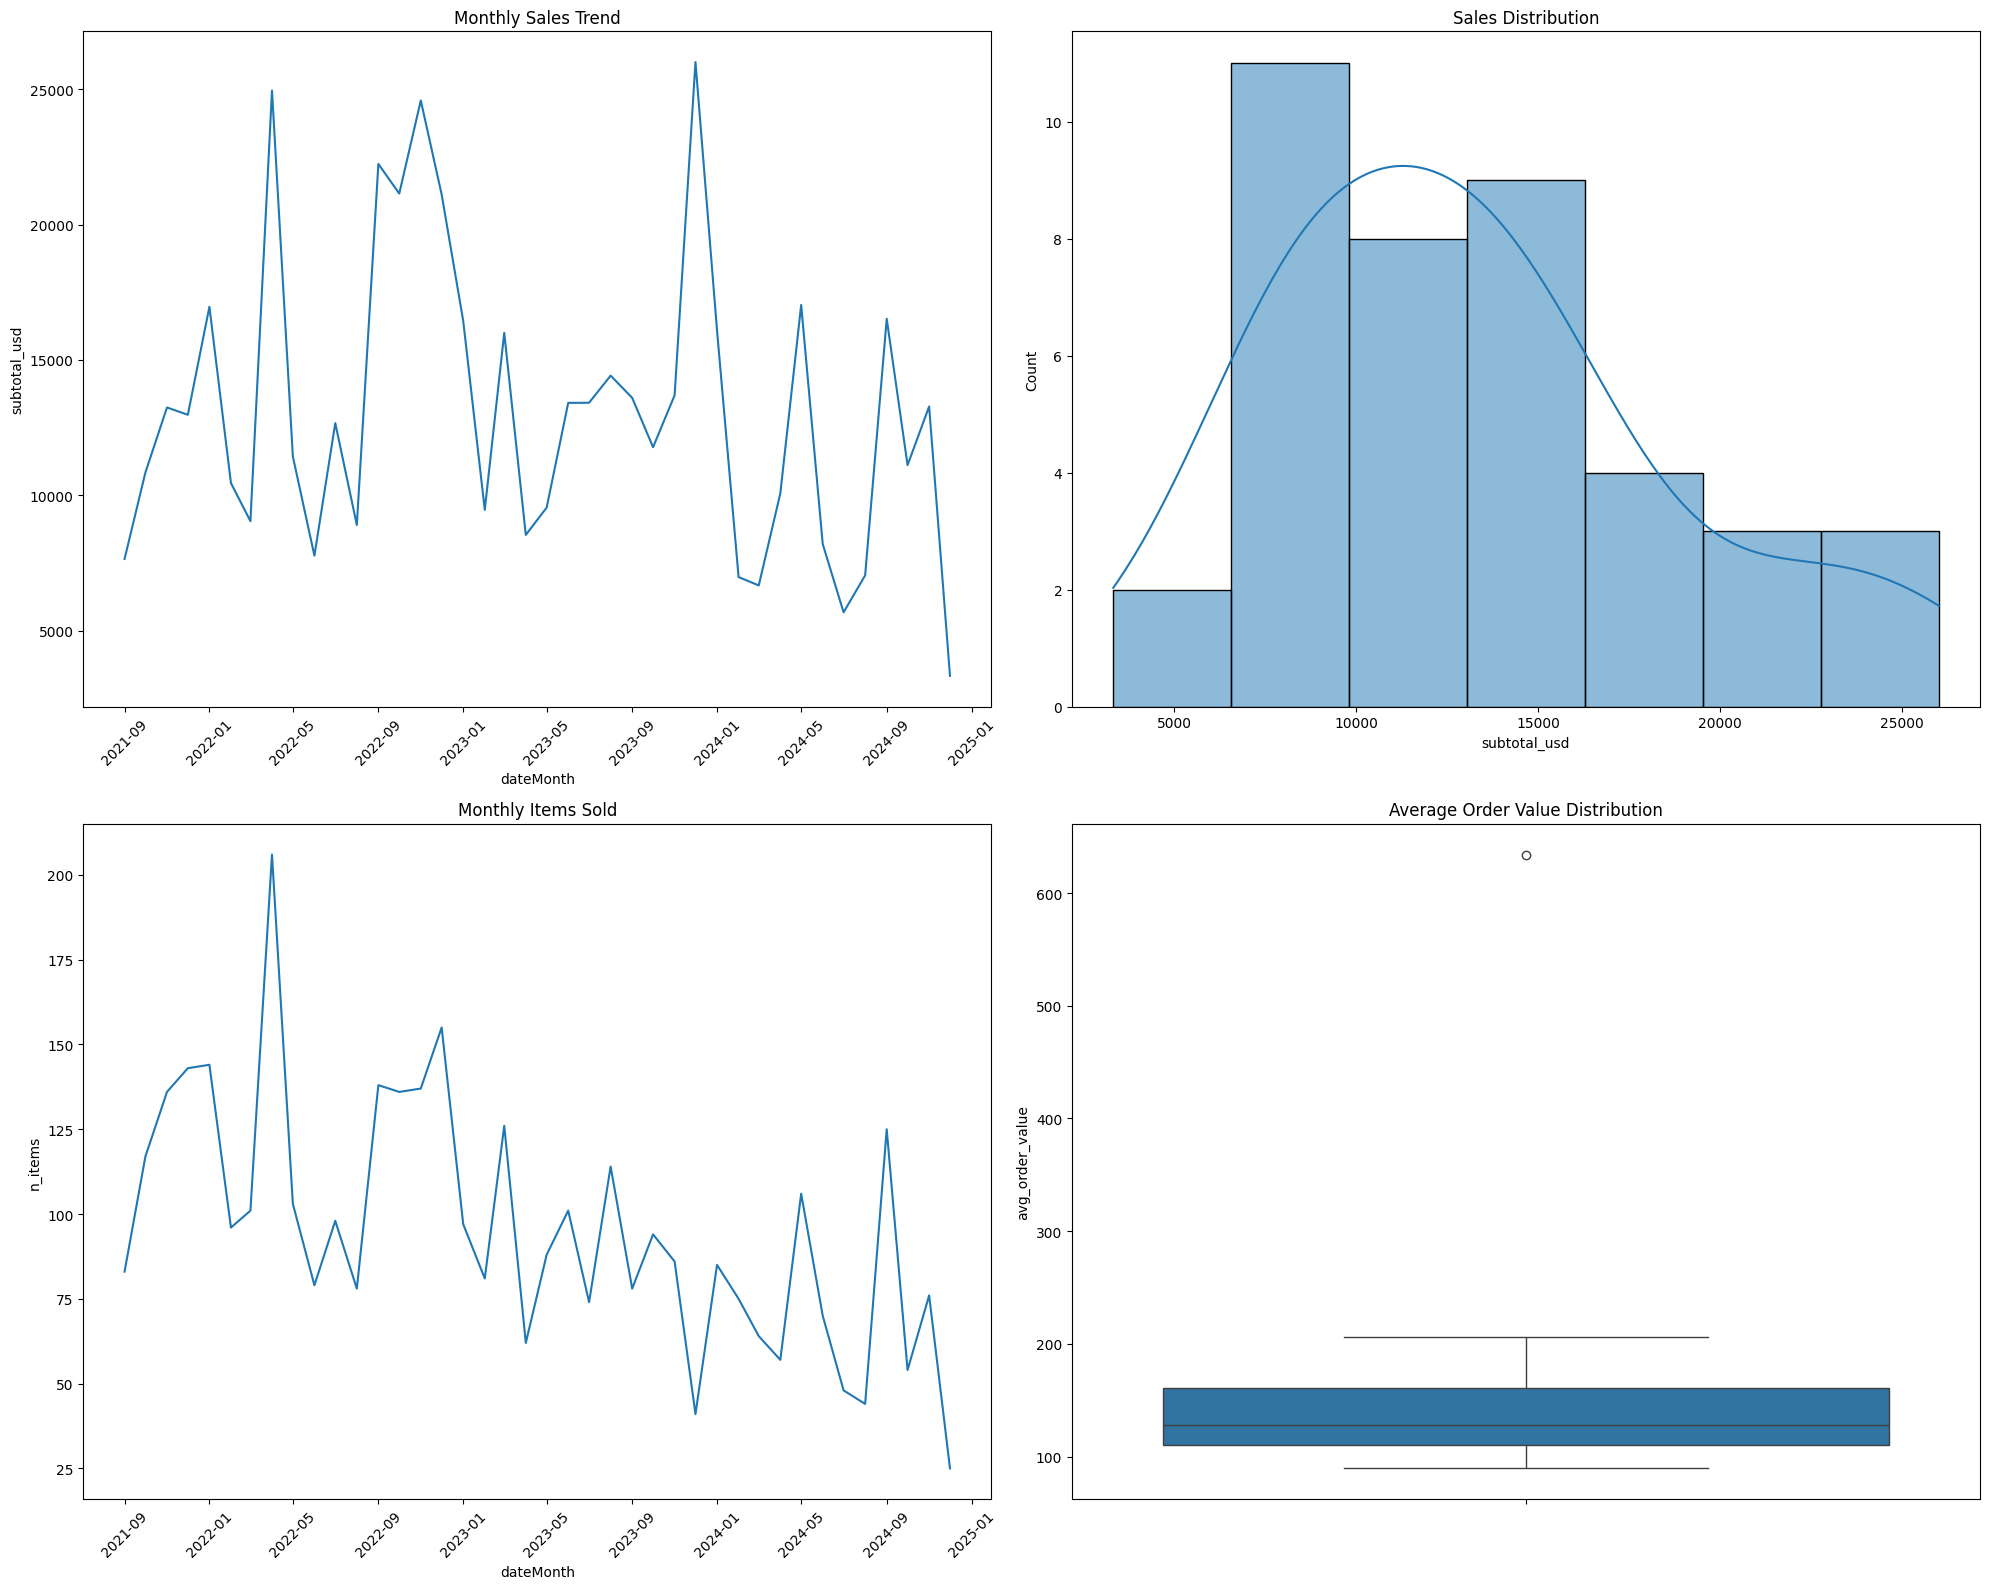

In [37]:
# 1. Sales Performance Analysis
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Monthly Sales Trend
sns.lineplot(data=monthly_sales, x='dateMonth', y='subtotal_usd', ax=axes[0,0])
axes[0,0].set_title('Monthly Sales Trend')
axes[0,0].tick_params(axis='x', rotation=45)

# Sales Distribution
sns.histplot(data=monthly_sales, x='subtotal_usd', kde=True, ax=axes[0,1])
axes[0,1].set_title('Sales Distribution')

# Monthly Items Sold
sns.lineplot(data=monthly_sales, x='dateMonth', y='n_items', ax=axes[1,0])
axes[1,0].set_title('Monthly Items Sold')
axes[1,0].tick_params(axis='x', rotation=45)

# Average Order Value
monthly_sales['avg_order_value'] = monthly_sales['subtotal_usd'] / monthly_sales['n_items']
sns.boxplot(data=monthly_sales, y='avg_order_value', ax=axes[1,1])
axes[1,1].set_title('Average Order Value Distribution')

plt.tight_layout()
plt.show()

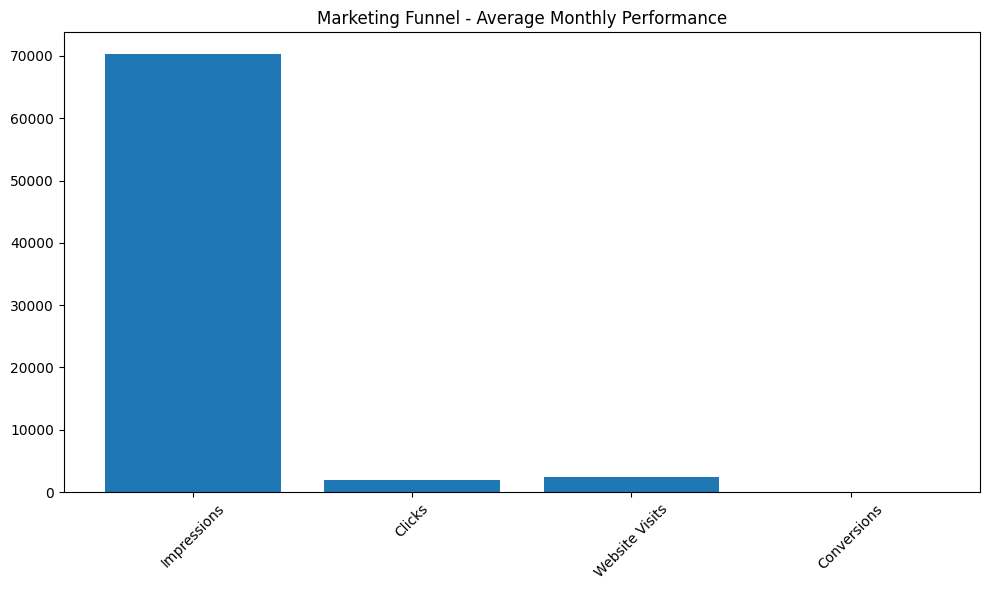

In [38]:
# 2. Marketing Funnel Analysis
monthly_sales['bounce_rate'] = 1 - (monthly_sales['clics'] / monthly_sales['visitas_web'])
monthly_sales['engagement_rate'] = monthly_sales['clics'] / monthly_sales['impresiones']
monthly_sales['conversion_rate'] = monthly_sales['unique_clients'] / monthly_sales['visitas_web']

# Funnel Visualization
fig, ax = plt.subplots(figsize=(10, 6))
funnel_stages = [
    monthly_sales['impresiones'].mean(),
    monthly_sales['clics'].mean(),
    monthly_sales['visitas_web'].mean(),
    monthly_sales['unique_clients'].mean()
]
funnel_labels = ['Impressions', 'Clicks', 'Website Visits', 'Conversions']

plt.bar(funnel_labels, funnel_stages)
plt.title('Marketing Funnel - Average Monthly Performance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

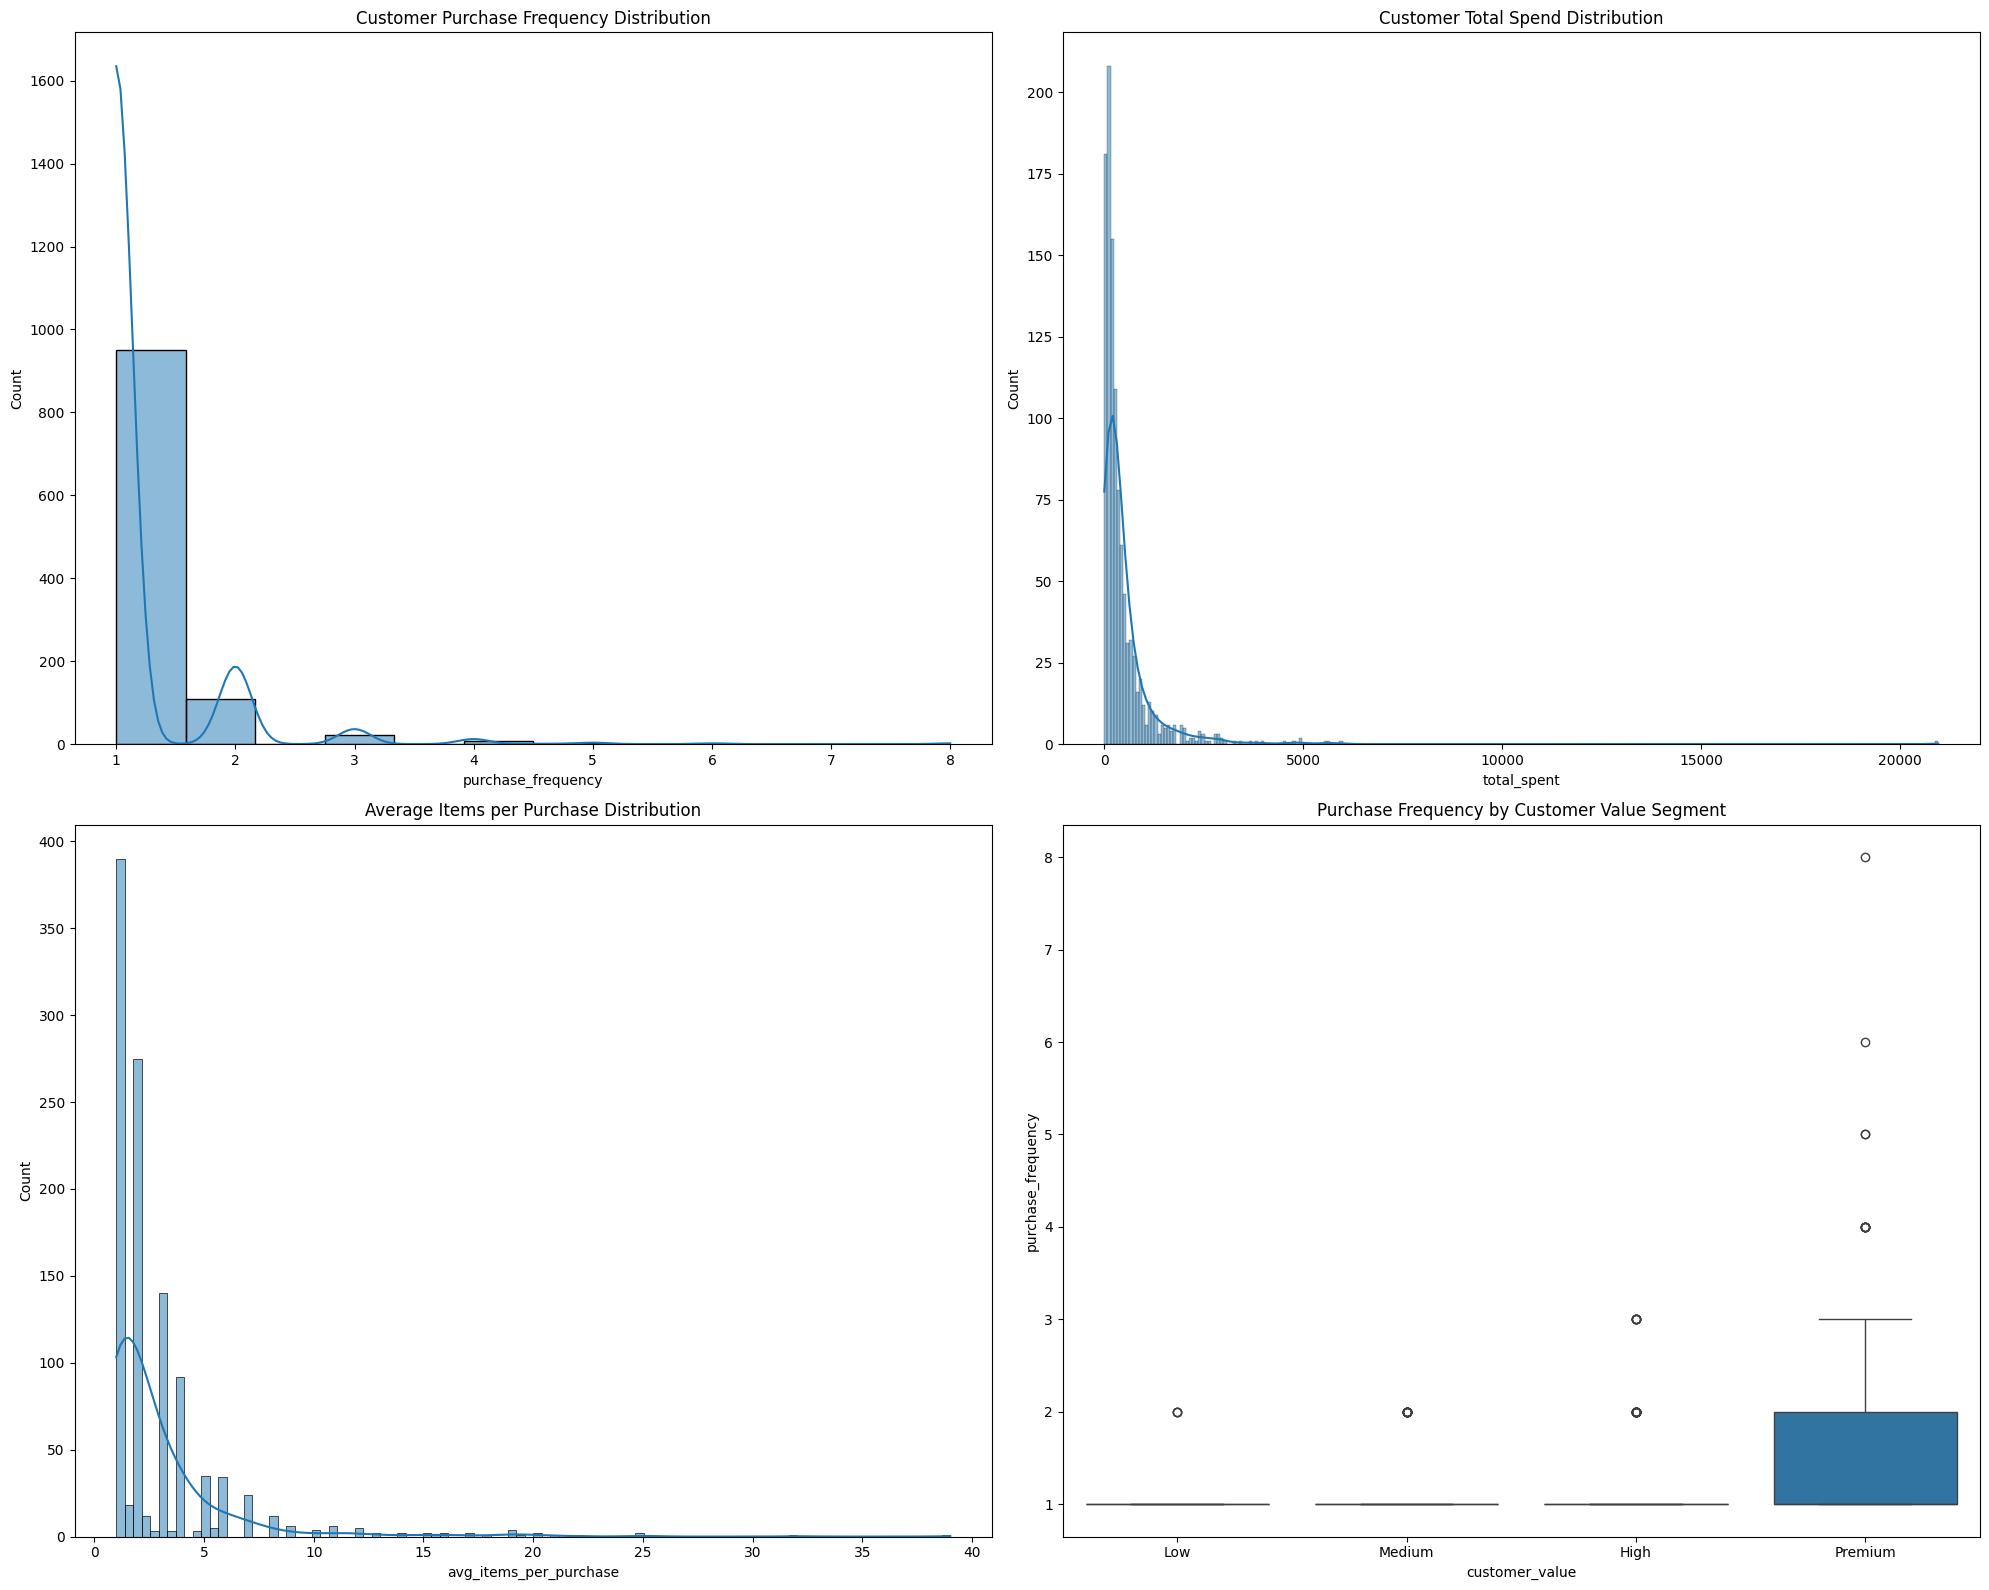

In [40]:
# 3. Customer Behavior Analysis
# Purchase Frequency Distribution
customer_purchases = daily_clients.groupby('cliente_id').agg({
    'Fecha': 'count',
    'subtotal_usd': 'sum',
    'cantidad': 'sum'
}).rename(columns={
    'Fecha': 'purchase_frequency',
    'subtotal_usd': 'total_spent',
    'cantidad': 'total_items'
})

fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Purchase Frequency
sns.histplot(data=customer_purchases, x='purchase_frequency', kde=True, ax=axes[0,0])
axes[0,0].set_title('Customer Purchase Frequency Distribution')

# Total Spent per Customer
sns.histplot(data=customer_purchases, x='total_spent', kde=True, ax=axes[0,1])
axes[0,1].set_title('Customer Total Spend Distribution')

# Items per Purchase
customer_purchases['avg_items_per_purchase'] = customer_purchases['total_items'] / customer_purchases['purchase_frequency']
sns.histplot(data=customer_purchases, x='avg_items_per_purchase', kde=True, ax=axes[1,0])
axes[1,0].set_title('Average Items per Purchase Distribution')

# Customer Value Segments
customer_purchases['customer_value'] = pd.qcut(customer_purchases['total_spent'], q=4, labels=['Low', 'Medium', 'High', 'Premium'])
sns.boxplot(data=customer_purchases, x='customer_value', y='purchase_frequency', ax=axes[1,1])
axes[1,1].set_title('Purchase Frequency by Customer Value Segment')

plt.tight_layout()
plt.show()


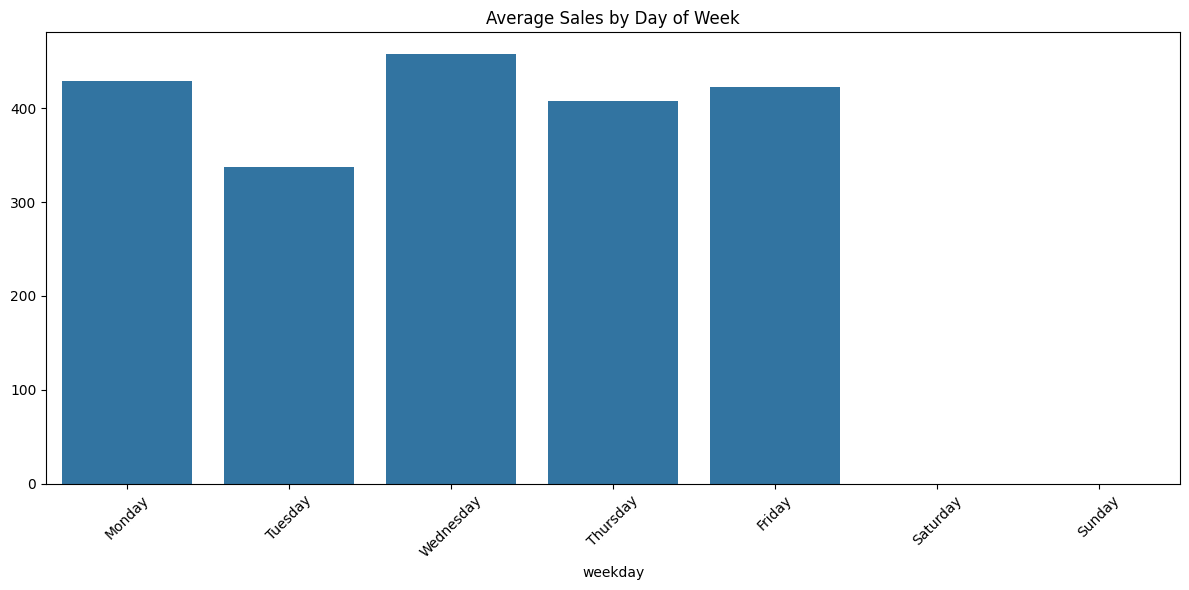

In [41]:
# 4. Seasonality and Time Patterns
# Create weekday and month columns
daily_clients['weekday'] = pd.to_datetime(daily_clients['Fecha']).dt.day_name()
daily_clients['month'] = pd.to_datetime(daily_clients['Fecha']).dt.month_name()

# Sales by Day of Week
daily_sales = daily_clients.groupby('weekday')['subtotal_usd'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.figure(figsize=(12, 6))
sns.barplot(x=daily_sales.index, y=daily_sales.values)
plt.title('Average Sales by Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Key Performance Indicators:

Marketing Metrics (Monthly Average):
engagement_rate    0.03
bounce_rate        0.17
conversion_rate    0.01
roas              26.31
dtype: float64

Customer Segments Summary:
                purchase_frequency  total_spent  total_items
customer_value                                              
Low                           1.01        63.59         1.35
Medium                        1.06       168.61         1.78
High                          1.15       354.36         2.95
Premium                       1.49      1333.88         7.93


C:\Users\nbuly\AppData\Local\Temp\ipykernel_13548\1512357765.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_segments = customer_purchases.groupby('customer_value').agg({


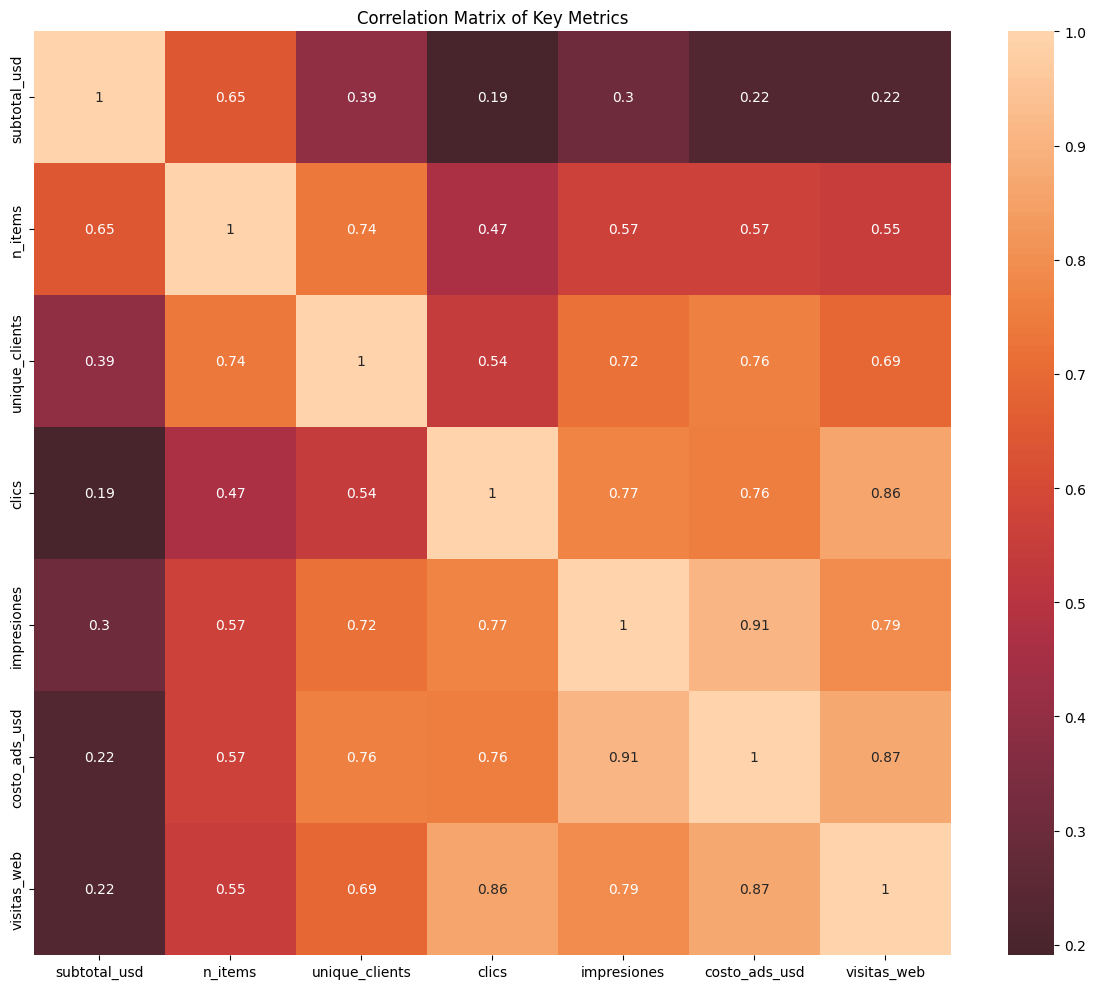

In [44]:
# 5. Key Performance Metrics Summary
print("\nKey Performance Indicators:")
print("\nMarketing Metrics (Monthly Average):")
marketing_metrics = monthly_sales[['engagement_rate', 'bounce_rate', 'conversion_rate', 'roas']].mean().round(3)
print(marketing_metrics)

print("\nCustomer Segments Summary:")
customer_segments = customer_purchases.groupby('customer_value').agg({
    'purchase_frequency': 'mean',
    'total_spent': 'mean',
    'total_items': 'mean'
}).round(2)
print(customer_segments)

# 6. Correlation Analysis
correlation_metrics = monthly_sales[[
    'subtotal_usd', 'n_items', 'unique_clients', 
    'clics', 'impresiones', 'costo_ads_usd', 'visitas_web'
]]

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_metrics.corr(), annot=True, center=0)
plt.title('Correlation Matrix of Key Metrics')
plt.tight_layout()
plt.show()


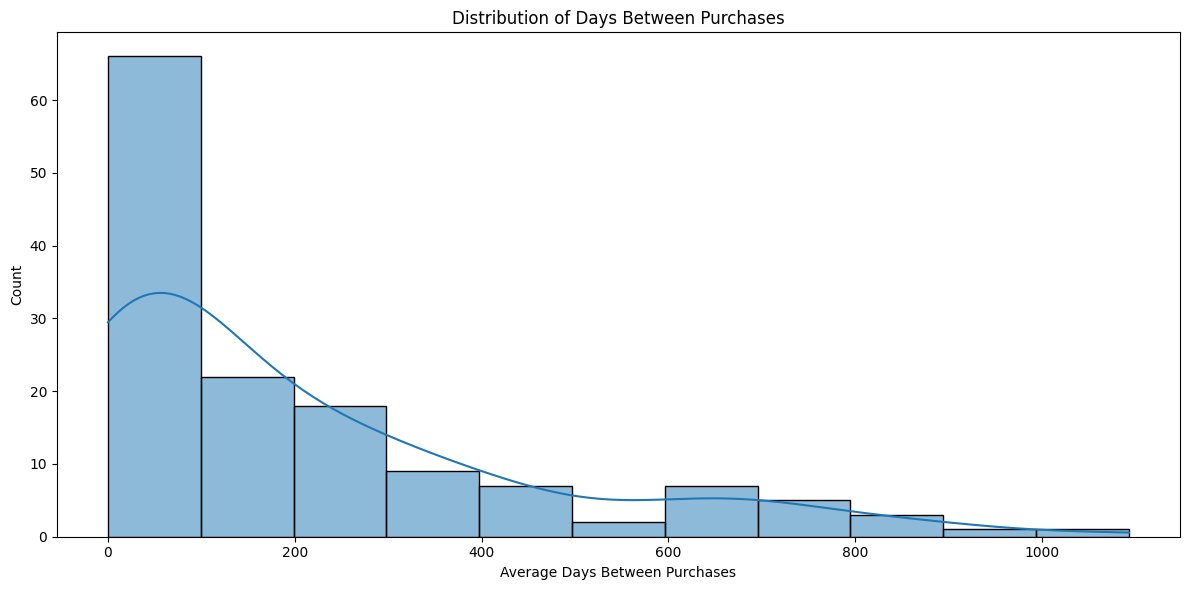

In [45]:
# 7. Customer Retention Analysis
# Calculate days between purchases for each customer
customer_purchase_dates = daily_clients.groupby('cliente_id')['Fecha'].agg(list)
customer_intervals = customer_purchase_dates.apply(
    lambda dates: np.mean(np.diff([pd.to_datetime(d) for d in sorted(dates)]).astype('timedelta64[D]').astype(float))
    if len(dates) > 1 else np.nan
)

plt.figure(figsize=(12, 6))
sns.histplot(customer_intervals.dropna(), kde=True)
plt.title('Distribution of Days Between Purchases')
plt.xlabel('Average Days Between Purchases')
plt.tight_layout()
plt.show()